### Статистические выводы 

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам. 

2. Постройте график по числу поездок по дате и времени.

3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат. 

4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение. 

6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм. 

7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. 

8. Найдите причину данной аномалии. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

Описание данных: 
* timestamp – дата и время (точность до часа)
* cnt – количество аренд велосипедов за этот час
* t1 – температура, в С
* t2 – температура "ощущается как", в С
* hum – влажность (%)
* wind_speed – скорость ветра, км/ч
* weather_code – погодные условия: 

    * 1 – ясно (SKC)

    * 2 – преимущественно ясно / встречаются отдельные облака (SCT)

    * 3 – облачно / значительные облака (BKN)

    * 4 – пасмурно (OVC)

    * 7 – небольшой дождь Rain/ light Rain shower/ Light rain

    * 10 – дождь с грозой

    * 26 – снегопад

    * 94 – ледяной туман (да, такое бывает!)

* isholiday – является ли день праздником (1 – праздник, 0 – нет)
* isweekend – является ли день выходным (1 – выходной, 0 – нет)
* season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json 
import os

from kaggle.api.kaggle_api_extended import KaggleApi

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам. 

In [80]:
os.chdir("C:/api")
data = {"username":"username","key":"tockenvalue"}
with open('kaggle.json', 'w') as outfile:
    json.dump(data, outfile)

api = KaggleApi('kaggle.json')
api.authenticate()

url = "hmavrodiev/london-bike-sharing-dataset"

api.dataset_download_files(url, path=r'C:\Users\User\notebooks\analytic_karpov\статистика\datasets',
                           unzip=True)                  

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset


In [81]:
url = r'C:\Users\User\notebooks\analytic_karpov\статистика\datasets\london_merged.csv'

In [82]:
data_london = pd.read_csv(url)
data_london.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [83]:
data_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [84]:
data_london.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [85]:
data_london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

2. Постройте график по числу поездок по дате и времени.


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


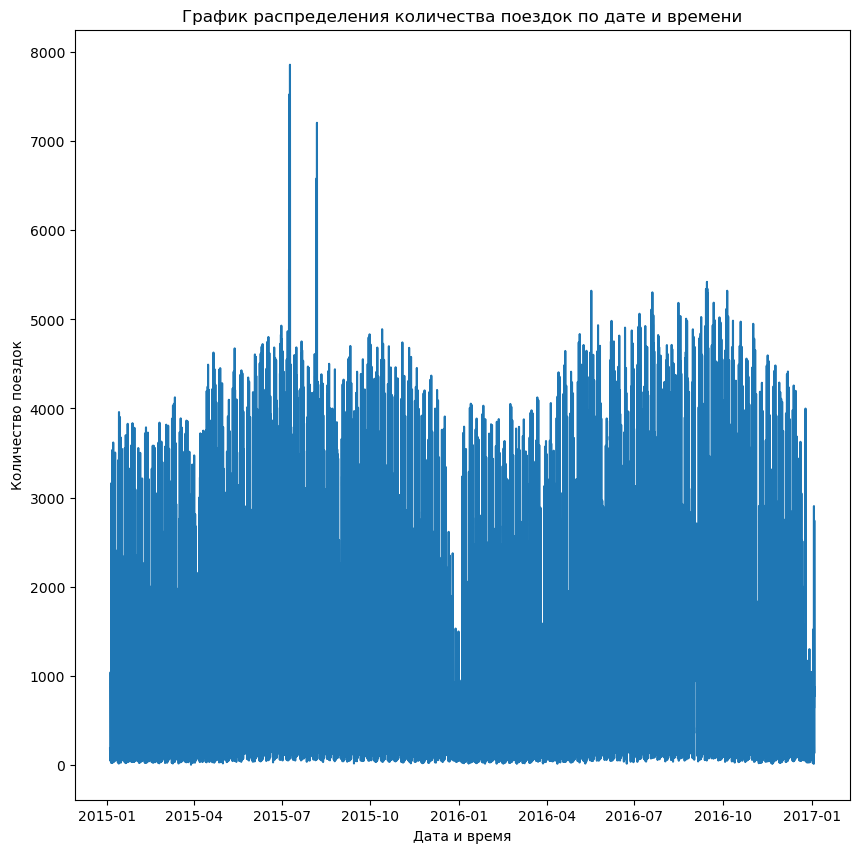

In [90]:
plt.figure(figsize=(10, 10))

sns.lineplot(data=data_london, x=data_london.timestamp, y=data_london.cnt)

plt.xlabel('Дата и время')
plt.ylabel('Количество поездок')
plt.title('График распределения количества поездок по дате и времени')

plt.show()

По графику ничего не проанализируешь...

3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат. 


сделаем с помощью pandas.resample() - преобразование частот временных рядов

правило D - группировка по дням

In [87]:
data_london.sort_values(by='timestamp', inplace=True)
data_london.set_index('timestamp', drop=False,inplace=True)
data_london.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [78]:
data_london.index = pd.to_datetime(data_london.index)
data_london.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [37]:
resample_cnt = data_london.resample('D').agg({'cnt': 'sum'})
resample_cnt

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


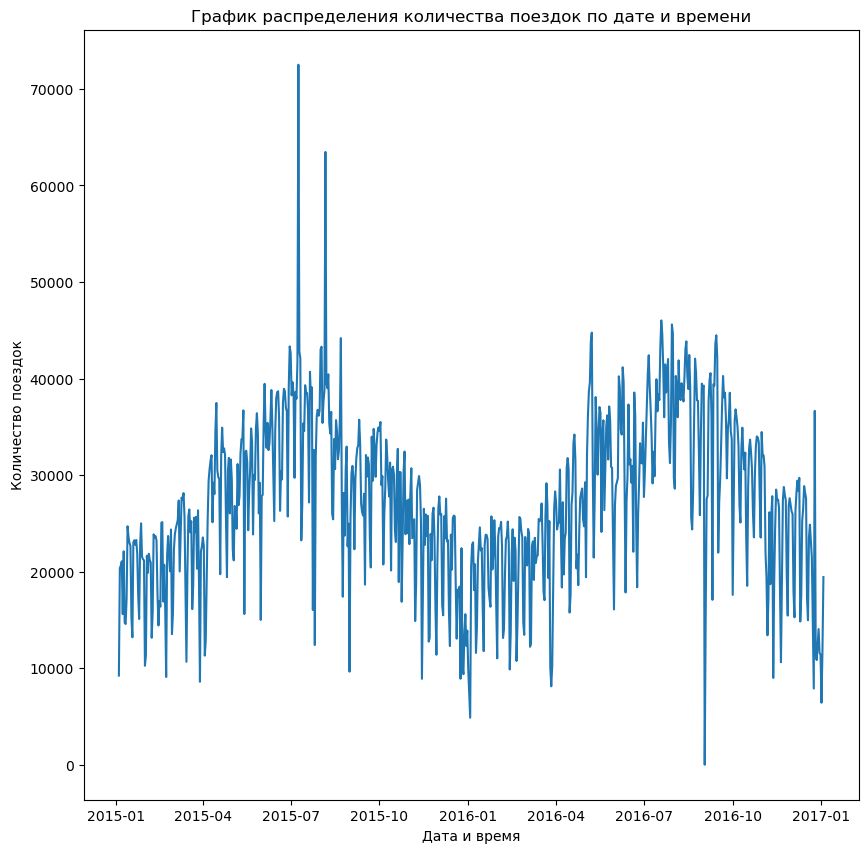

In [39]:
plt.figure(figsize=(10, 10))

sns.lineplot(data=resample_cnt, x=resample_cnt.index, y=resample_cnt.cnt)

plt.xlabel('Дата и время')
plt.ylabel('Количество поездок')
plt.title('График распределения количества поездок по дате и времени')

plt.show()

Вывод:
* зимой меньше всего берут на прокат велосипеды
* резкие скачки аренд велосипедов
* максимальное число - 70000

4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

Для этого разделим дальнейшие действия на несколько этапов:

* сначала посчитаем скользящее среднее, чтобы сгладить ряд
* далее – разницу между наблюдаемыми и сглаженными значениями
* определим верхние и нижние границы 99% доверительного интервала
* найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [40]:
by_day = data_london.resample('D').cnt.sum().reset_index()
by_day

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [42]:
by_day_roll = data_london.resample('D').cnt.sum().rolling(3).mean().reset_index()
by_day_roll.head()

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667


In [50]:
roll_2015_07_09 = by_day_roll.query('timestamp == "2015-07-09"')
print(f"Среднее скользящее для 2015-07-09: {roll_2015_07_09.iloc[-1]}")

Среднее скользящее для 2015-07-09: timestamp    2015-07-09 00:00:00
cnt                      50705.0
Name: 186, dtype: object



5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение. 

Разницу между сглаженными и наблюдаемыми значениями посчитаем через стандартное отклонение (std)

In [51]:
std_cnt = np.round(np.std(by_day.cnt - by_day_roll.cnt), 2)
std_cnt

4558.59

6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм. 


Доверительный интервал для 99% - nu + 2.58 * std

std берём, поскольку у нас ГС, а не выборка

In [53]:
lower_board = by_day_roll.cnt - 2 * std_cnt 
upper_board = by_day_roll.cnt + 2 * std_cnt

by_day['upper_board'] = upper_board
by_day['lower_board'] = lower_board

by_day.head(3)

,timestamp,cnt,upper_board,lower_board
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,25856.846667,7622.486667


7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. 


Изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала, а затем меньше

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [57]:
anomaly_by_day_upp = by_day[by_day.cnt > by_day.upper_board]
anomaly_by_day_upp

,timestamp,cnt,upper_board,lower_board
186,2015-07-09,72504,59822.180000,41587.820000
205,2015-07-28,36101,35918.180000,17683.820000
214,2015-08-06,63468,55744.513333,37510.153333
365,2016-01-04,20533,19982.846667,1748.486667
609,2016-09-04,27512,23376.180000,5141.820000
721,2016-12-25,36653,28767.846667,10533.486667


In [58]:
anomaly_by_day_low = by_day[by_day.cnt < by_day.lower_board]
anomaly_by_day_low

,timestamp,cnt,upper_board,lower_board
84,2015-03-29,8592,27092.513333,8858.153333
130,2015-05-14,15609,37826.513333,19592.153333
187,2015-07-10,42779,61445.846667,43211.486667
188,2015-07-11,42091,61575.180000,43340.820000
189,2015-07-12,23240,45153.846667,26919.486667
201,2015-07-24,16034,40130.846667,21896.486667
232,2015-08-24,17400,38646.513333,20412.153333
239,2015-08-31,9639,28193.513333,9959.153333
314,2015-11-14,8898,30154.513333,11920.153333
405,2016-02-13,9869,28408.513333,10174.153333


8. Найдите причину данной аномалии. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномал

В чём причина аномалий? Просмотрим датасет 

In [ ]:
data_london['date'] = data_london['timestamp'].dt.date

anomaly_by_day_low['date'] = anomaly_by_day_low['timestamp'].dt.date

result = data_london.merge(anomaly_by_day_low, on='date', how='inner')

print(result)


            timestamp_x  cnt_x    t1    t2    hum  wind_speed  weather_code  \
0   2015-03-29 00:00:00    395  10.0   8.0  72.75       30.75           4.0   
1   2015-03-29 01:00:00      0  10.5   8.5  77.00       33.00           7.0   
2   2015-03-29 03:00:00    282  10.0   7.0  85.00       25.00           7.0   
3   2015-03-29 04:00:00    216  10.0   7.5  88.00       18.50           4.0   
4   2015-03-29 05:00:00    112  11.0  11.0  74.50       23.00           4.0   
..                  ...    ...   ...   ...    ...         ...           ...   
497 2016-12-10 19:00:00    298  13.0  13.0  88.00       26.00           7.0   
498 2016-12-10 20:00:00    203  12.0  12.0  91.00       25.00           7.0   
499 2016-12-10 21:00:00    179  10.5   9.0  85.00       28.00           7.0   
500 2016-12-10 22:00:00    332   9.0   6.5  87.00       17.00           7.0   
501 2016-12-10 23:00:00    347   9.0   7.0  84.50       15.00           2.0   

     is_holiday  is_weekend  season        date tim

C:\Users\User\AppData\Local\Temp\ipykernel_2656\102976077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_by_day_low['date'] = anomaly_by_day_low['timestamp'].dt.date


IS_weekend - везде 1 - значит это по выходным.

В некоторые дни были забастовки в Лондоне
Выходые дни в приоритете из-за желания проехаться на велосипеде по городу 

Причина аномалии - забастовки и выходные 

In [91]:
data_london['timestamp'] = pd.to_datetime(data_london['timestamp'])

anomaly_by_day_upp['timestamp'] = pd.to_datetime(anomaly_by_day_upp['timestamp'])

data_london['date'] = data_london['timestamp'].dt.date
anomaly_by_day_upp['date'] = anomaly_by_day_upp['timestamp'].dt.date

result = data_london.merge(anomaly_by_day_upp, on='date', how='inner')

print(result)


            timestamp_x  cnt_x    t1    t2   hum  wind_speed  weather_code  \
0   2015-07-09 00:00:00    400  16.0  16.0  55.0        14.0           1.0   
1   2015-07-09 01:00:00    212  15.5  15.5  59.0        14.0           1.0   
2   2015-07-09 02:00:00    111  14.0  14.0  67.0        15.0           1.0   
3   2015-07-09 03:00:00     81  14.0  14.0  63.0        18.5           1.0   
4   2015-07-09 04:00:00     76  14.0  14.0  63.0        18.0           1.0   
..                  ...    ...   ...   ...   ...         ...           ...   
139 2016-12-25 19:00:00   1799  13.5  13.5  79.5        27.5           4.0   
140 2016-12-25 20:00:00   1455  13.0  13.0  82.0        28.0           7.0   
141 2016-12-25 21:00:00   1081  13.0  13.0  77.0        30.0           4.0   
142 2016-12-25 22:00:00    885  13.0  13.0  77.0        29.5           4.0   
143 2016-12-25 23:00:00    662  13.0  13.0  79.5        28.0           4.0   

     is_holiday  is_weekend  season        date timestamp_y  cn

C:\Users\User\AppData\Local\Temp\ipykernel_2656\1313075416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_by_day_upp['timestamp'] = pd.to_datetime(anomaly_by_day_upp['timestamp'])
C:\Users\User\AppData\Local\Temp\ipykernel_2656\1313075416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly_by_day_upp['date'] = anomaly_by_day_upp['timestamp'].dt.date


Недостаточно данных для выявления аномалий, поэтому не можем проверить аномалию на самом деле.